# Linear Regression

Let's practice linear regression.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

## Sample Data: Home Prices vs Square Feet

In [2]:
# let's simulate 100 homes with square feet
# and the price per square foot within a certain range.
np.random.seed(34)
square_feet = np.random.randint(500, 2000, size=1000)
home_price = square_feet * np.random.randint(100, 250, size=1000)

homes_df = pd.DataFrame(
    data = {'square_feet': square_feet, 'price': home_price}
)

homes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
square_feet    1000 non-null int64
price          1000 non-null int64
dtypes: int64(2)
memory usage: 15.7 KB


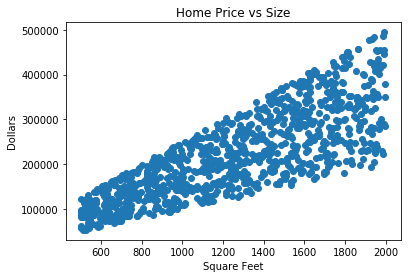

In [3]:
# do we appear to have a linear relationship? yes
plt.scatter(x=homes_df.square_feet, y=homes_df.price)
plt.xlabel('Square Feet')
plt.ylabel('Dollars')
plt.title('Home Price vs Size');

## Statsmodels Approach

In [4]:
# add an intercept
homes_df['intercept'] = 1

# generate linear model using least squared
mod = sm.OLS(homes_df['price'], homes_df[['intercept', 'square_feet']])
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1822.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          2.57e-227
Time:                        12:40:38   Log-Likelihood:                -12362.
No. Observations:                1000   AIC:                         2.473e+04
Df Residuals:                     998   BIC:                         2.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -1993.1143   5471.223     -0.364      0.716   -1.27e+04    8743.306
square_feet   177.5497      4.160     42.682      0.000     169.387     185.713
==============================================================================
Omnibus:                       19.675   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.996
Skew:                          -0.000   Prob(JB):                      0.00410
Kurtosis:                       2.486   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the Results

* The square_feet p-value indicates it is statistically significant in predicting the home price.
* The square_feet coefficient indicates that for every square foot increase, the home price increased by $177.
* The R-squared value indicates there is a good fit with the model and data.

## Using sklearn


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
# we still have our example data from above:
homes_df.head()

square_feet   price  intercept
0         1941  281445          1
1         1646  296280          1
2          990  207900          1
3         1609  226869          1
4          824  170568          1

In [22]:
# first, split data into x and Y.
# Y = what we want to predict. X = vars we use to predict.
# x must be a 2D array even with one predictor.
Y = homes_df['price']
x = homes_df[['square_feet']]

# then, split our data into training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

# instantiate the model then fit it.
model = LinearRegression()
model.fit(x_train, y_train)

# check the score
model.score(x_test, y_test)

0.59284196831270641

In [23]:
model.coef_

array([ 179.78749307])

In [24]:
model.intercept_

-4404.5179935765918

In [25]:
# predict the home price for one that's 1700 square feet.
model.predict(1750)

array([ 310223.59488565])

In [36]:
# predict lots of home prices.  show actual vs predicted values.
y_pred = model.predict(x_test) 

plt.scatter(x=y_test, y=y_pred)
plt.xlabel('Actual Home Price')
plt.ylabel('Predicted Home Price');